## About Dataset
RHMCD-20 dataset, we took care to include information from a wide range of sources, including teenagers from Bangladesh, college students, housewives, professionals from businesses and corporations, and other people.This is survey data for Depression and Mental Health Data Analysis.# eracting with 

Survey questions:


- Age: Represents the age of the participants.
- Gender: Indicates the gender of the participants.
- Occupation: Represents the participant's occupations.
- Days_Indoors :Indicates the number of days the participant has not been out of the house
- Growing_Stress: Indicates the participant's stress is increasing day by day (Yes/No).
- Quarantine_Frustration: Frustrations in the first two weeks of quarantine (Yes/Maybe/No).
- Changes_Habits: Represents major changes in eating habits and sleeping (Yes/Maybe/No).mo).
- Weight_Change :Highlights changes in body weight during quarantine (Yes/Maybe/No)
- Mood_Swings: Represents extreme mood changes (Low/Medium/High).
- Coping_Struggles: The inability to cope with daily problems or stress (Yes/Maybe/No).
- Work_Interest :Represents whether the participant is losing interest in working (Yes/No).
- Social_Weakness :Conveys feeling mentally weak when interacting with others (Yes/No).th others (Yes/No).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('mental_health_finaldata_1.csv')

Checking is there's NaN values and duplicates.

In [3]:
display(df.duplicated().sum())
display(df.isna().sum())

0

Age                        0
Gender                     0
Occupation                 0
Days_Indoors               0
Growing_Stress             0
Quarantine_Frustrations    0
Changes_Habits             0
Mental_Health_History      0
Weight_Change              0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
dtype: int64

**So, as we can see there's no dups or NaN values. Now we can see the info about DF**

In [4]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      824 non-null    object
 1   Gender                   824 non-null    object
 2   Occupation               824 non-null    object
 3   Days_Indoors             824 non-null    object
 4   Growing_Stress           824 non-null    object
 5   Quarantine_Frustrations  824 non-null    object
 6   Changes_Habits           824 non-null    object
 7   Mental_Health_History    824 non-null    object
 8   Weight_Change            824 non-null    object
 9   Mood_Swings              824 non-null    object
 10  Coping_Struggles         824 non-null    object
 11  Work_Interest            824 non-null    object
 12  Social_Weakness          824 non-null    object
dtypes: object(13)
memory usage: 83.8+ KB


In [5]:
df.sample(3)

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
604,30-Above,Female,Housewife,1-14 days,No,Yes,Maybe,Maybe,Maybe,High,No,No,No
721,20-25,Male,Others,1-14 days,Maybe,No,Maybe,Yes,Maybe,Medium,No,No,Maybe
386,25-30,Male,Student,1-14 days,Yes,Maybe,Yes,Yes,Maybe,Medium,Yes,Maybe,No


**Let's see age distribution.**

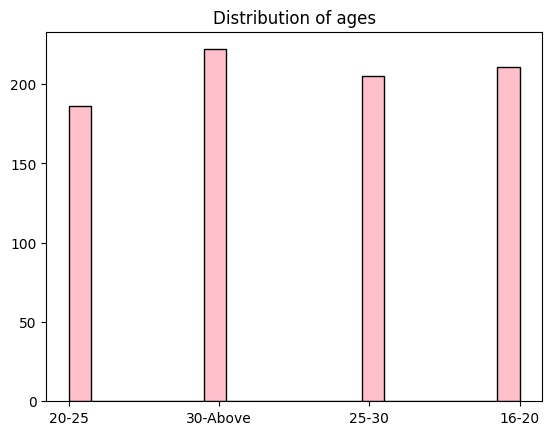

In [6]:
df['Age'].hist(bins=20, grid=False, edgecolor='black', color='pink')
plt.title('Distribution of ages');

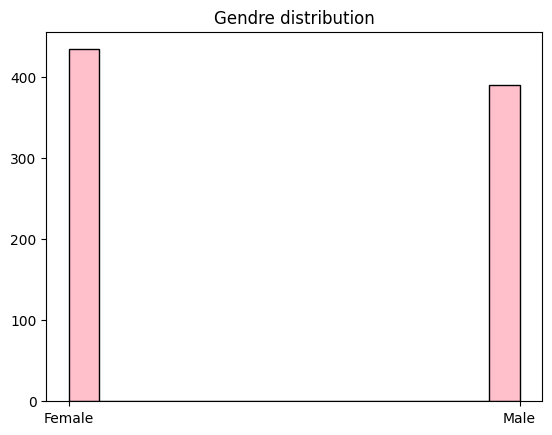

In [7]:
df['Gender'].hist(bins=15, grid=False, edgecolor='black', color='pink')
plt.title('Gendre distribution');

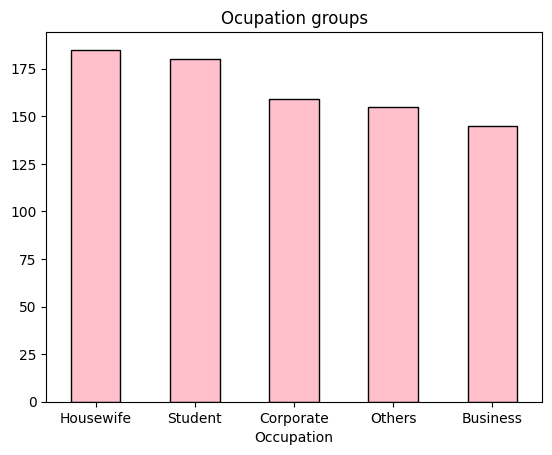

In [8]:
df['Occupation'].value_counts().plot(kind='bar', edgecolor='black', color='pink')
plt.xticks(rotation=0)
plt.title('Ocupation groups');

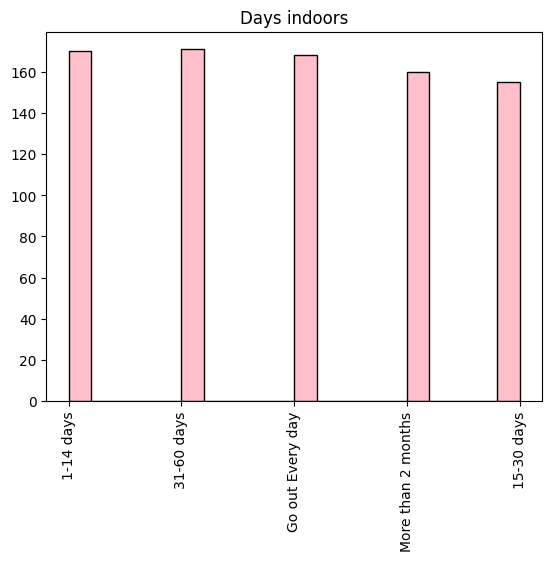

In [9]:
plt.xticks(rotation=90)
plt.title('Days indoors')
df['Days_Indoors'].hist(bins=20, grid=False, edgecolor='black', color='pink');

In [10]:
colors = ['#ffa7b4', '#ffcbd2', '#ffb972']

Let's see the columns

In [11]:
display(df.columns)

Index(['Age', 'Gender', 'Occupation', 'Days_Indoors', 'Growing_Stress',
       'Quarantine_Frustrations', 'Changes_Habits', 'Mental_Health_History',
       'Weight_Change', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest',
       'Social_Weakness'],
      dtype='object')

In [12]:
columns_to_pie = ['Growing_Stress','Quarantine_Frustrations', 'Changes_Habits', 
                  'Mental_Health_History','Weight_Change', 'Mood_Swings',
                  'Coping_Struggles', 'Work_Interest','Social_Weakness'
                 ]

columns_for_title = ['Is stress growing?', 'Did you have quarantine frustations?', 'Did you changed habints',
                     'Do you have any disorders?', 'Have your weight changed?', 'Do you have mood swings?',
                     'Have you copped with struggles?', 'Do you have interest in your work?', 'Have you feel social weakness?'
                    ]

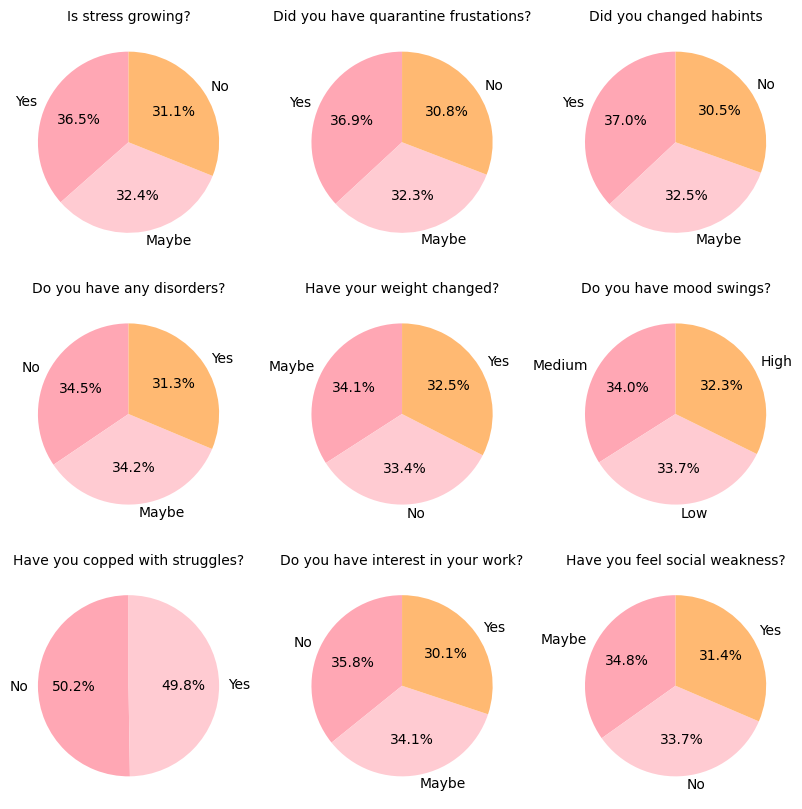

In [13]:
figure, axis = plt.subplots(3, 3, figsize=(10, 10))
axis = axis.flatten()

for ax, column, name_columns in zip(axis, columns_to_pie, columns_for_title):
    ax.set_title(name_columns, fontsize=10)
    df[column].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax, colors=colors, startangle=90)
    ax.set_ylabel('')
plt.show()

# Additional info about data set

## Mood swing distribution by gender

In [14]:
pivot_table_mood = df.pivot_table(index='Gender', columns='Mood_Swings', aggfunc='size')
sum_row_female = pivot_table_mood.iloc[0].sum(axis=0)

In [15]:
display(pivot_table_mood)
display(sum_row_female)

Mood_Swings,High,Low,Medium
Gender,,,
Female,146,144,144
Male,120,134,136


434

In [16]:
mood_swing_level = ['High', 'Medium', 'Low']
genders = ['Female', 'Male']

In [17]:
sum_row_female

434

In [18]:
#TODO! additional, but not the main.
row_index = -1
for gender in genders:
    row_index += 1
    for level in mood_swing_level:
        display(f'{gender}, {level}, Persantage , {pivot_table_mood[level][gender]/pivot_table_mood.iloc[row_index].sum(axis=0)}')

'Female, High, Persantage , 0.33640552995391704'

'Female, Medium, Persantage , 0.3317972350230415'

'Female, Low, Persantage , 0.3317972350230415'

'Male, High, Persantage , 0.3076923076923077'

'Male, Medium, Persantage , 0.3487179487179487'

'Male, Low, Persantage , 0.3435897435897436'

## As we can see in percentage points female is likely has high mood swing. For the man this high mood swing is the lower. But the difference for female in those 3 groups almost imperceptibly. Difference less than a percentage point. For the men the difference is higher. Compared for others 2 groups high mood swing has 4 percentage points less than medium and low groups

# Conclusion

- Women are more susceptible to mood swings. The high level has 3 percentage points more than the men.
- Stress level is growing, with the most percentage than the others answers by 4 percent.
- Many people have experienced quarantine frustration, still the biggest group, by the same 4 percent.
- What is good is that many people have changed their habits. 37 percent of them.
- Only 31 percent of people certainly have any disorders.
- For 33.4 percent of people their weight has not changed. For 32.5 weight has changed, and for others hard to say.
- 32.5 percent of people have a high mood swing level, 34 percent have a medium mood swing level, and 33.7 percent low mood swing level.
- Half have copped struggles and half have not.
- Most people are not interested in their work - 35.8 percent. 34.1 is not sure and only 30.1 interested in it.
- Most people are not sure if they have a social weakness - 34.8 percent. 33.7 certainly has not. And 31.4 certainly does have.
- Most people stayed indoors for 1-60 days.
- Most of the questioned are older than 30.
- Most of the questioned were female.
- Most of the questioned were the housewives.